In [ ]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("consumo_hogar.csv")

# Mostrar las primeras filas
print("🔹 Primeras filas del DataFrame:")
print(df.head())

# Información general del DataFrame
print("\n🔹 Información del DataFrame:")
print(df.info())

# Estadísticas descriptivas
print("\n🔹 Estadísticas descriptivas:")
print(df.describe())


In [ ]:
import pandas as pd
from scipy.stats import zscore

# Cargar el archivo CSV
df = pd.read_csv("consumo_hogar.csv")

# -------------------------
# 1. Imputar valores nulos con la media
# -------------------------
df_clean = df.copy()
df_clean.fillna(df_clean.mean(numeric_only=True), inplace=True)

# -------------------------
# 2. Calcular Z-score para detección de outliers
# -------------------------
z_scores = df_clean.apply(zscore)

# -------------------------
# 3. Eliminar outliers con Z-score > 3 en cualquier columna
# -------------------------
df_no_outliers = df_clean[(z_scores.abs() <= 3).all(axis=1)]

# Mostrar resumen
print(f"Filas originales: {df_clean.shape[0]}")
print(f"Filas después de eliminar outliers: {df_no_outliers.shape[0]}")
print(f"Filas eliminadas: {df_clean.shape[0] - df_no_outliers.shape[0]}")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
sns.set(style="whitegrid")

# Lista de variables independientes
variables = ["Temperatura", "Personas", "Electrodomesticos"]

# Crear gráficos de dispersión
plt.figure(figsize=(18, 5))
for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df_no_outliers, x=var, y="Consumo_kWh", alpha=0.5)
    plt.title(f"{var} vs Consumo_kWh")
    plt.xlabel(var)
    plt.ylabel("Consumo_kWh")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Separar variables independientes y dependiente
X = df_no_outliers[["Temperatura", "Personas", "Electrodomesticos"]]
y = df_no_outliers["Consumo_kWh"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

# Mostrar coeficientes e intercepto
print("📌 Regresión Lineal Múltiple:")
print("  Coeficientes:", modelo_lineal.coef_)
print("  Intercepto:", modelo_lineal.intercept_)


In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Regresión polinómica de grado 2
modelo_poly2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
modelo_poly2.fit(X_train, y_train)

# Regresión polinómica de grado 3
modelo_poly3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
modelo_poly3.fit(X_train, y_train)

print("\n📌 Regresión Polinómica de Grado 2 y 3 entrenadas correctamente.")



📌 Regresión Polinómica de Grado 2 y 3 entrenadas correctamente.


Modelo			MSE			R2
Lineal			16.07		0.817
Polinómico G2		16.06		0.817
Polinómico G3		16.06		0.817


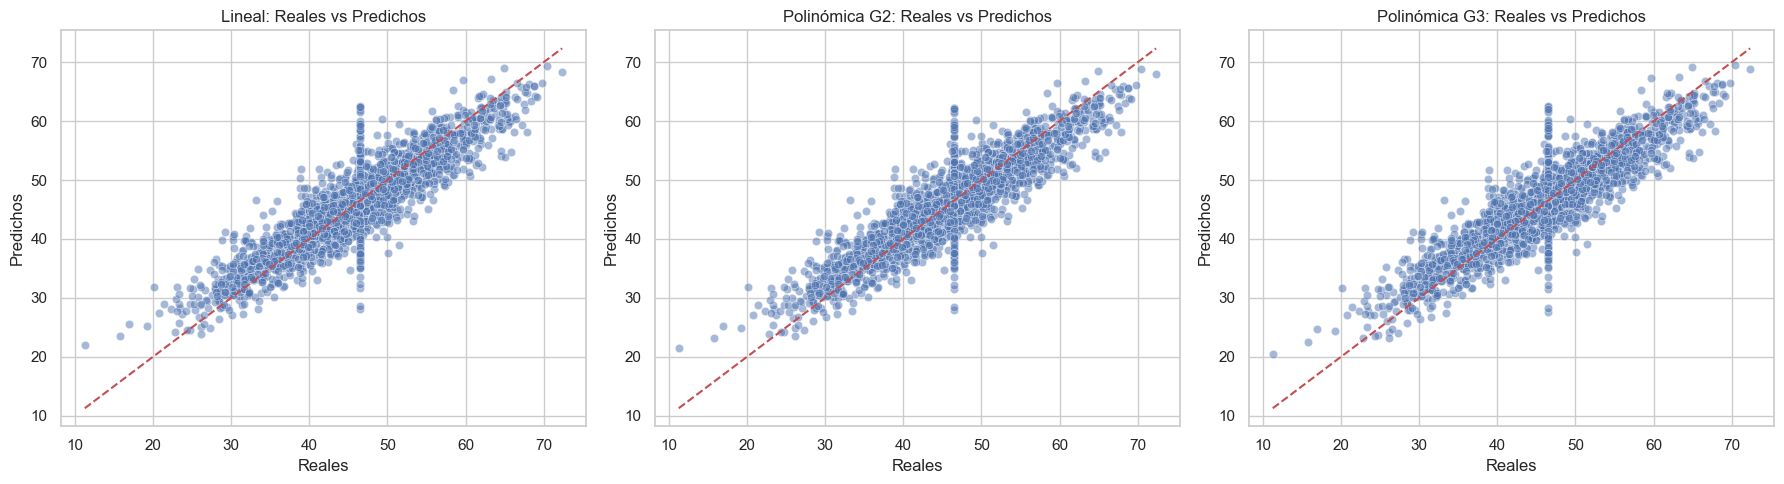

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predicciones
y_pred_lineal = modelo_lineal.predict(X_test)
y_pred_poly2 = modelo_poly2.predict(X_test)
y_pred_poly3 = modelo_poly3.predict(X_test)

# Métricas de evaluación
mse_lineal = mean_squared_error(y_test, y_pred_lineal)
r2_lineal = r2_score(y_test, y_pred_lineal)

mse_poly2 = mean_squared_error(y_test, y_pred_poly2)
r2_poly2 = r2_score(y_test, y_pred_poly2)

mse_poly3 = mean_squared_error(y_test, y_pred_poly3)
r2_poly3 = r2_score(y_test, y_pred_poly3)

# Mostrar resultados
print("Modelo\t\t\tMSE\t\t\tR2")
print(f"Lineal\t\t\t{mse_lineal:.2f}\t\t{r2_lineal:.3f}")
print(f"Polinómico G2\t\t{mse_poly2:.2f}\t\t{r2_poly2:.3f}")
print(f"Polinómico G3\t\t{mse_poly3:.2f}\t\t{r2_poly3:.3f}")

# Graficar reales vs predichos
plt.figure(figsize=(18, 5))

model_names = ["Lineal", "Polinómica G2", "Polinómica G3"]
predictions = [y_pred_lineal, y_pred_poly2, y_pred_poly3]

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=y_test, y=predictions[i], alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
    plt.xlabel("Reales")
    plt.ylabel("Predichos")
    plt.title(f"{model_names[i]}: Reales vs Predichos")

plt.tight_layout()
plt.show()
